In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the heart disease data

* age
* sex 
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target: 0=no disease, 1=disease

Categorical variables: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'

Non-categorical: "age", "trestbps", "chol", "thalach", "oldpeak", "target"

In [2]:
df = pd.read_csv('datasets/heart/heart.csv')

# Exploratory data analysis

### Descriptive statistics on non-categorical variables

In [3]:
df.info() # number of null counts per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Descriptive statistics

In [4]:
df[["age", "trestbps", "chol", "thalach", "oldpeak"]].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


### Which features are correlated?

In [5]:
corr_matrix = df[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\vabalagon\AppData\Local\Temp\ipykernel_42168\3602181047.py:6: FutureWarning: `null_color` is deprecated: use `color` instead
  (corr_matrix
C:\Users\vabalagon\AppData\Local\Temp\ipykernel_42168\3602181047.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2))


,age,trestbps,chol,thalach,oldpeak
age,nan,nan,nan,nan,nan
trestbps,0.27,nan,nan,nan,nan
chol,0.22,0.13,nan,nan,nan
thalach,-0.39,-0.04,-0.02,nan,nan
oldpeak,0.21,0.19,0.06,-0.35,nan


No strong correlation.

### Scatter matrix

<IPython.core.display.Javascript object>


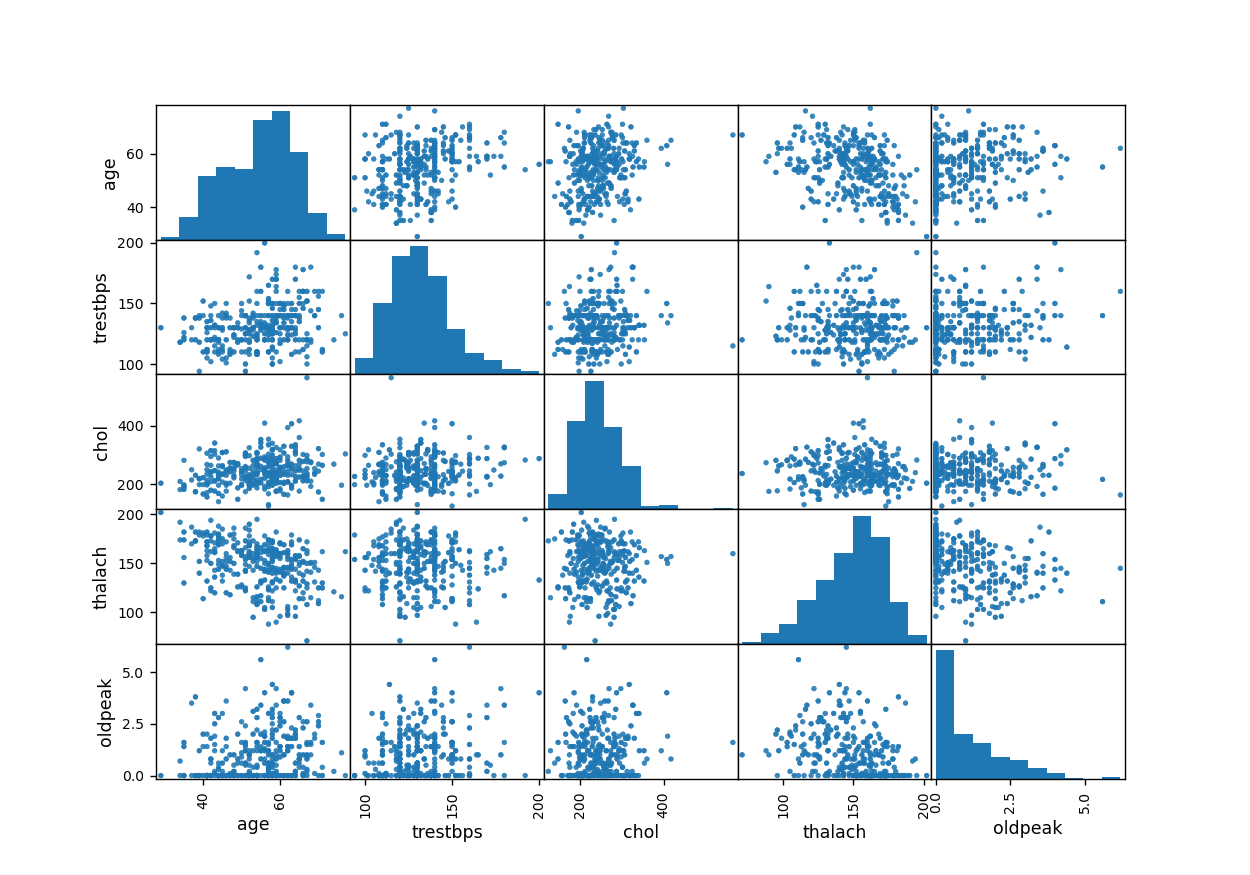

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='thalach'>,
        <AxesSubplot:xlabel='trestbps', ylabel='thalach'>,
        <AxesSubplot:xlabel='chol', ylabel='thalach'>,
       

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["age", "trestbps", "chol", "thalach", "oldpeak"]], figsize=(10,7))

### Counts per categorical variable

<IPython.core.display.Javascript object>


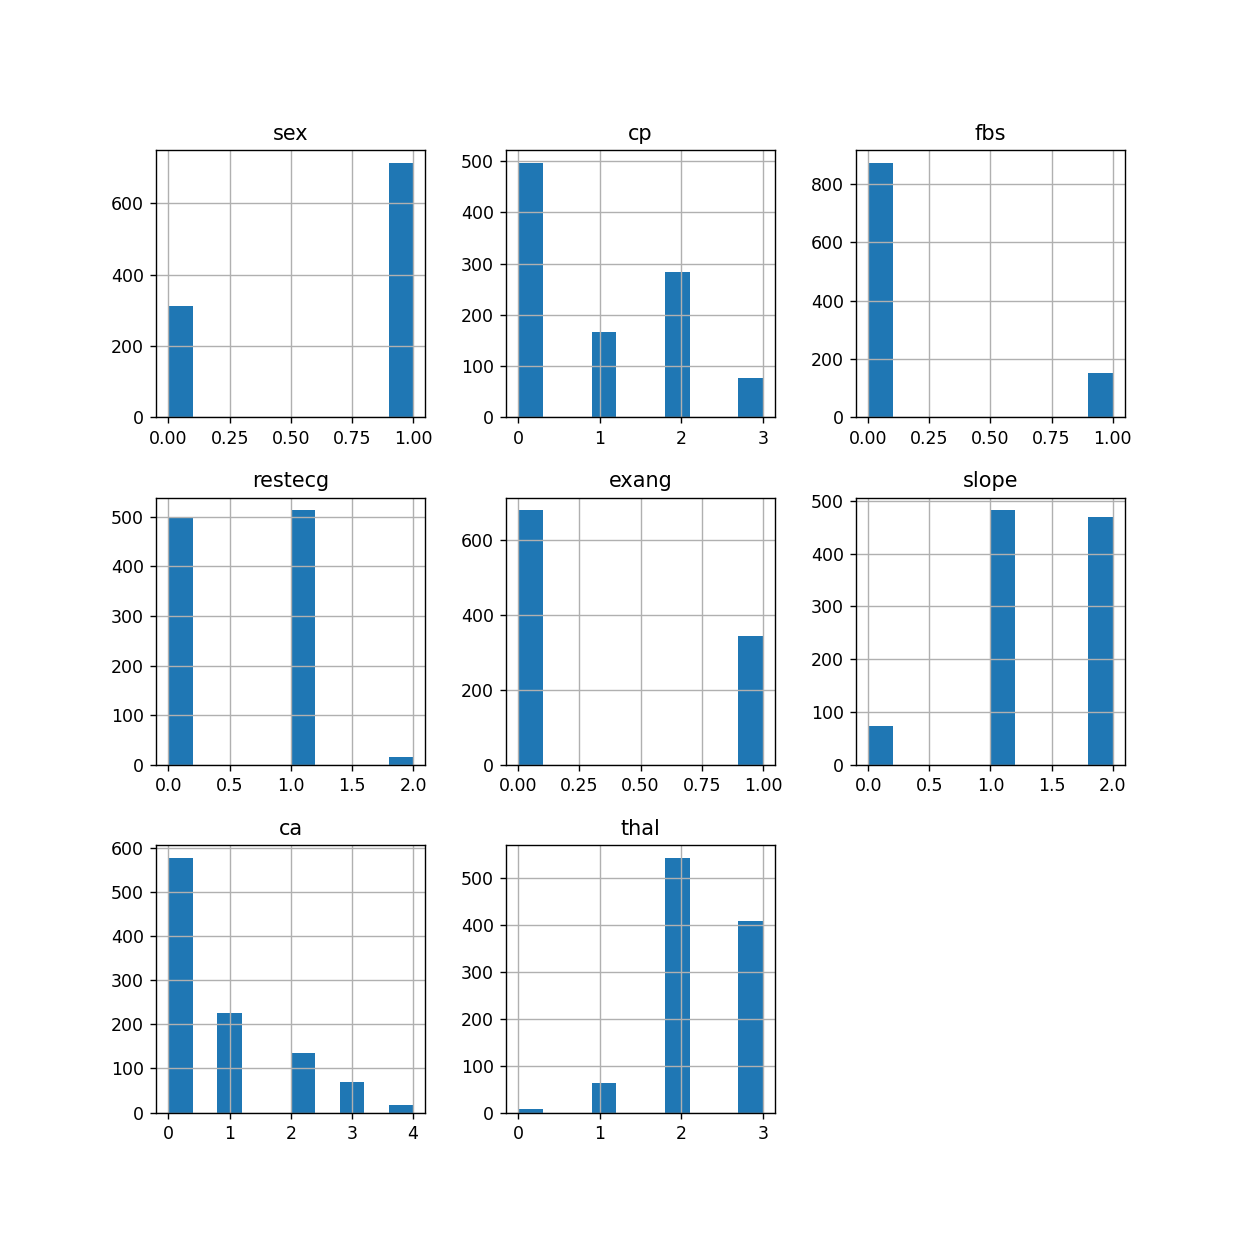

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'thal'}>, <AxesSubplot:>]],
      dtype=object)

In [7]:
df.drop(["age", "trestbps", "chol", "thalach", "oldpeak", "target"], axis=1).hist(figsize=(10,10))

### Balanced dataset?

<IPython.core.display.Javascript object>


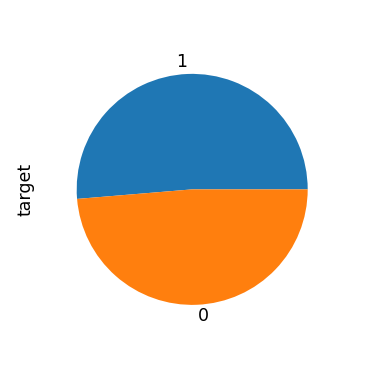

<AxesSubplot:ylabel='target'>

In [9]:
plt.figure(figsize=(3,3))
df["target"].value_counts().plot(kind='pie')

Balanced dataset (Check)

# Data Transformation

### Apply one-hot encoding on the categorical variables by using pd.get_dummies

In [10]:
df_categorical = pd.get_dummies(df.drop(["age", "trestbps", "chol", "thalach", "oldpeak", "target"], axis=1), 
               columns=df.drop(["age", "trestbps", "chol", "thalach", "oldpeak", "target"], axis=1).columns,
              drop_first=True)

categorical_data = df_categorical
categorical_data.head()

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0


### Apply feature scaling on the non-categorical variables

In [11]:
from sklearn.preprocessing import StandardScaler

non_categorical_data = StandardScaler().fit_transform(df[["age", "trestbps", "chol", "thalach", "oldpeak"]].values) # mean=0 and variance=1 for all columns
non_categorical_data = pd.DataFrame(non_categorical_data, columns=["age", "trestbps", "chol", "thalach", "oldpeak"])
non_categorical_data.head()

C:\Users\vabalagon\.conda\envs\DataScienceStandard\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,age,trestbps,chol,thalach,oldpeak
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888
1,-0.158157,0.479107,-0.833861,0.255968,1.727137
2,1.716595,0.764688,-1.396233,-1.048692,1.301417
3,0.724079,0.936037,-0.833861,0.516900,-0.912329
4,0.834359,0.364875,0.930822,-1.874977,0.705408


### Putting together the dataset

The features now look like 
age, trestbps, chol, thalach, oldpeak, age, trestbps, chol, "thalach, oldpeak, target

In [12]:
df = pd.concat([categorical_data, non_categorical_data, df['target']], axis=1)
print(df.columns)
X = df.drop(['target'], axis=1).values
y = df['target'].values

Index(['sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_1', 'thal_2', 'thal_3', 'age', 'trestbps', 'chol', 'thalach',
       'oldpeak', 'target'],
      dtype='object')


### Split into train and test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, test_size = 0.3, shuffle=True, random_state=42)

# Modelling

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

##### Perform gridsearch to find the best parameter

In [16]:
# Create a kNN instance
kNN_clf_grid = KNeighborsClassifier() 

# Dictionary of possible parameter values per parameter
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range) 

# Grid search step
grid_kNN = GridSearchCV(kNN_clf_grid, param_grid, cv=20, scoring='accuracy', return_train_score=False, verbose=1)
grid_kNN = grid_kNN.fit(X_train, y_train)

Fitting 20 folds for each of 30 candidates, totalling 600 fits


In [17]:
print("Best parameter:", grid_kNN.best_params_)
print("Accuracy score:", grid_kNN.best_score_)

Best parameter: {'n_neighbors': 1}
Accuracy score: 0.9804761904761905


##### We use these model parameters

In [18]:
kNN_clf = KNeighborsClassifier(n_neighbors=grid_kNN.best_params_['n_neighbors'])
kNN_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

##### Predict on test data

In [19]:
kNN_y_predicted = kNN_clf.predict(X_test)

##### Accuracy score

In [20]:
print("Performance on training set:", accuracy_score(y_train, kNN_clf.predict(X_train)))
print("Performance on test set:", accuracy_score(y_test, kNN_clf.predict(X_test)))

Performance on training set: 1.0
Performance on test set: 0.9805194805194806


##### Confusion matrix

In [21]:
confusion_matrix(y_test, kNN_y_predicted).ravel() # tn, fp, fn, tp

array([159,   0,   6, 143], dtype=int64)

##### kNN Classification report

In [22]:
print(classification_report(y_test, kNN_y_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



##### AUC Curve

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

##### Plain logreg with L2 regularization

In [24]:
logreg_clf_grid = LogisticRegression(penalty="l2")

# Dictionary of possible parameter values per parameter
C_range = np.linspace(0.1, 1, 20).tolist()
param_grid = dict(C=C_range) # Note that C is the inverse of the regularization parameter

# Grid search step
grid_logreg = GridSearchCV(logreg_clf_grid, param_grid, cv=20, scoring='accuracy', return_train_score=True, verbose=1)
grid_logreg = grid_logreg.fit(X_train, y_train)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


In [25]:
grid_logreg.best_params_

{'C': 0.9526315789473684}

In [26]:
grid_logreg.best_score_

0.8882539682539683

#### Choose the best parameter

In [27]:
logreg_plain = LogisticRegression(penalty="l2", C=grid_logreg.best_params_['C'])
logreg_plain.fit(X_train, y_train)

LogisticRegression(C=0.9526315789473684)

##### Performance metrics

In [28]:
print("Performance on training set:", accuracy_score(y_train, logreg_plain.predict(X_train)))
print("Performance on test set:", accuracy_score(y_test, logreg_plain.predict(X_test)))

Performance on training set: 0.899581589958159
Performance on test set: 0.8181818181818182


##### Confusion matrix

In [29]:
confusion_matrix(y_test, logreg_plain.predict(X_test)).ravel() # tn, fp, fn, tp

array([125,  34,  22, 127], dtype=int64)

### Logistic Regression with Polynomial features

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('estimator', LogisticRegression(penalty="l2"))
])

# Dictionary of possible parameter values per parameter
C_range = np.linspace(0.1, 5, 50).tolist()
param_grid = dict(C=C_range) # Note that C is the inverse of the regularization parameter

# Grid search step
grid_logreg_poly = GridSearchCV(pipe, param_grid, cv=20, scoring='accuracy', return_train_score=True, verbose=1)
grid_logreg_poly = pipe.fit(X_train, y_train)

In [31]:
# Go back to X first (no standard scaler yet)
poly_log_reg = PolynomialFeatures(3)
X_poly_logreg = poly_log_reg.fit_transform(X)

# Standard scaler
X_poly_logreg = StandardScaler().fit_transform(X_poly_logreg)

X_train_poly_logreg, X_test_poly_logreg, y_train_poly_logreg, y_test_poly_logreg = train_test_split(X_poly_logreg, 
                                                                                                    y, 
                                                                                                    test_size = 0.3)

#### Apply GridCV on the regularization parameter

In [32]:
logreg_clf_grid_poly = LogisticRegression(penalty="l2")

# Dictionary of possible parameter values per parameter
C_range = np.linspace(0.1, 5, 50).tolist()
param_grid = dict(C=C_range) # Note that C is the inverse of the regularization parameter

# Grid search step
grid_logreg_poly = GridSearchCV(logreg_clf_grid_poly, param_grid, cv=20, scoring='accuracy', return_train_score=True, verbose=1)
grid_logreg_poly = grid_logreg.fit(X_train_poly_logreg, y_train_poly_logreg)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


In [33]:
grid_logreg_poly.best_params_

{'C': 0.1}

In [34]:
grid_logreg_poly.best_score_

0.9791269841269841

##### Choosing the best parameter

In [35]:
logreg_poly = LogisticRegression(penalty="l2", C=grid_logreg_poly.best_params_['C'])
logreg_poly.fit(X_train_poly_logreg, y_train_poly_logreg)

LogisticRegression(C=0.1)

##### Performance metrics

In [36]:
print("Performance on training set:", accuracy_score(y_train_poly_logreg, logreg_poly.predict(X_train_poly_logreg)))
print("Performance on test set:", accuracy_score(y_test_poly_logreg, logreg_poly.predict(X_test_poly_logreg)))

Performance on training set: 0.99860529986053
Performance on test set: 0.9805194805194806


##### Confusion matrix

In [37]:
confusion_matrix(y_test_poly_logreg, logreg_poly.predict(X_test_poly_logreg)).ravel() # tn, fp, fn, tp

array([156,   3,   3, 146], dtype=int64)

## SVM

In [38]:
from sklearn.svm import SVC

#### Linear SVM

In [39]:
svm_linear_grid = SVC(kernel='linear')

# Dictionary of possible parameter values per parameter
C_range = np.linspace(0.01, 1, 30).tolist()
param_grid = dict(C=C_range) # Note that C is the inverse of the regularization parameter

# Grid search step
grid_svm_linear = GridSearchCV(svm_linear_grid, param_grid, cv=20, scoring='accuracy', return_train_score=True, verbose=1)
grid_svm_linear = grid_svm_linear.fit(X_train, y_train)

Fitting 20 folds for each of 30 candidates, totalling 600 fits


In [40]:
grid_svm_linear.best_params_

{'C': 0.3513793103448276}

In [41]:
grid_svm_linear.best_score_

0.8896825396825397

##### Choosing the best linear SVM model

In [42]:
svm_linear = SVC(kernel='linear', C=grid_svm_linear.best_params_['C'])
svm_linear.fit(X_train, y_train)

SVC(C=0.3513793103448276, kernel='linear')

In [43]:
print("Performance on training set:", accuracy_score(y_train, svm_linear.predict(X_train)))
print("Performance on test set:", accuracy_score(y_test, svm_linear.predict(X_test)))

Performance on training set: 0.8967921896792189
Performance on test set: 0.814935064935065


##### Confusion matrix

In [44]:
confusion_matrix(y_test, svm_linear.predict(X_test)).ravel() # tn, fp, fn, tp

array([125,  34,  23, 126], dtype=int64)

#### Polynomial Kernel SVM

In [45]:
svm_poly_grid = SVC(kernel='poly')

# Dictionary of possible parameter values per parameter
degree_range = [i for i in range(2, 5)]
C_range = np.linspace(0.01, 5, 60).tolist()
param_grid = dict(degree=degree_range, C=C_range)

# Grid search step
grid_svm_poly = GridSearchCV(svm_poly_grid, param_grid, cv=10, scoring='accuracy', return_train_score=True, verbose=1)
grid_svm_poly = grid_svm_poly.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [46]:
grid_svm_poly.best_params_

{'C': 4.915423728813559, 'degree': 4}

In [47]:
grid_svm_poly.best_score_

0.9706768388106417

##### Choosing the best model

In [48]:
svm_poly = SVC(kernel='poly', C=grid_svm_poly.best_params_['C'])
svm_poly.fit(X_train, y_train)

SVC(C=4.915423728813559, kernel='poly')

In [49]:
print("Performance on training set:", accuracy_score(y_train, svm_poly.predict(X_train)))
print("Performance on test set:", accuracy_score(y_test, svm_poly.predict(X_test)))

Performance on training set: 0.9888423988842399
Performance on test set: 0.974025974025974


In [50]:
confusion_matrix(y_test, svm_poly.predict(X_test)).ravel() # tn, fp, fn, tp

array([151,   8,   0, 149], dtype=int64)

#### RBF Kernel SVM

In [51]:
svm_rbf_grid = SVC(kernel='rbf')

# Dictionary of possible parameter values per parameter
C_range = np.logspace(-5, 5, 10)
gamma_range = np.logspace(-3, 3, 10)
param_grid = dict(gamma=gamma_range, C=C_range)

grid_svm_rbf = GridSearchCV(svm_rbf_grid, param_grid=param_grid, cv=10, scoring='accuracy', return_train_score=True, verbose=1)
grid_svm_rbf.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05]),
                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [52]:
grid_svm_rbf.best_params_

{'C': 3.593813663804626, 'gamma': 0.46415888336127775}

In [53]:
grid_svm_rbf.best_score_

0.9790297339593115

##### Choosing the best model

In [54]:
svm_rbf = SVC(kernel='rbf', gamma=grid_svm_rbf.best_params_['gamma'], C=grid_svm_rbf.best_params_['C'])
svm_rbf.fit(X_train, y_train)

SVC(C=3.593813663804626, gamma=0.46415888336127775)

In [55]:
print("Performance on training set:", accuracy_score(y_train, svm_rbf.predict(X_train)))
print("Performance on test set:", accuracy_score(y_test, svm_rbf.predict(X_test)))

Performance on training set: 1.0
Performance on test set: 0.9902597402597403


In [56]:
confusion_matrix(y_test, svm_rbf.predict(X_test)).ravel() # tn, fp, fn, tp

array([159,   0,   3, 146], dtype=int64)

## Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [59]:
print("Performance on training set:", accuracy_score(y_train, naive_bayes.predict(X_train)))
print("Performance on test set:", accuracy_score(y_test, naive_bayes.predict(X_test)))

Performance on training set: 0.8479776847977685
Performance on test set: 0.8181818181818182


In [60]:
confusion_matrix(y_test, naive_bayes.predict(X_test)).ravel() # tn, fp, fn, tp

array([123,  36,  20, 129], dtype=int64)

## Decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
decision_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter="best", random_state=0)
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [80]:
print("Performance on training set:", accuracy_score(y_train, decision_tree_clf.predict(X_train)))
print("Performance on test set:", accuracy_score(y_test, decision_tree_clf.predict(X_test)))

Performance on training set: 0.99581589958159
Performance on test set: 0.9805194805194806


In [81]:
confusion_matrix(y_test, decision_tree_clf.predict(X_test)).ravel() # tn, fp, fn, tp

array([159,   0,   6, 143], dtype=int64)

##### Show the decision rules

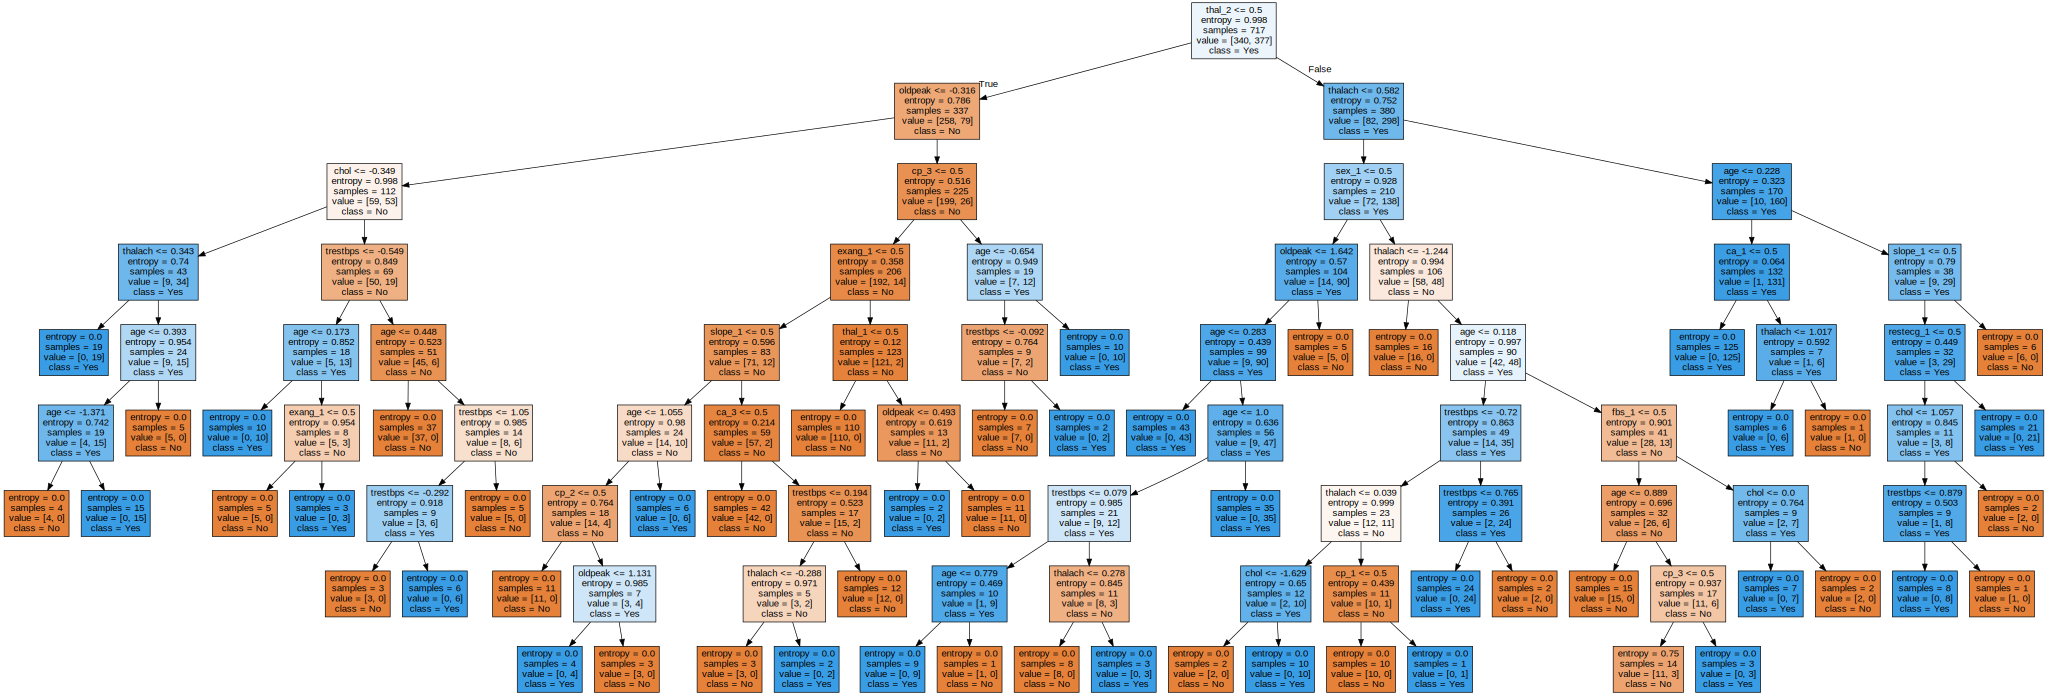

In [82]:
import graphviz
from sklearn import tree

_ = tree.export_graphviz(decision_tree_clf,
                   feature_names=df.drop("target", axis=1).columns,  
                   class_names=["No", "Yes"],
                   filled=True,
                   out_file=None)

dec_tree = graphviz.Source(_, format="png") 
dec_tree

## Random Forest

## XGBoost

# Model evaluation

In [83]:
def clf_report_generator(models):
    def clf_report_individual(model, data=None, print_scores=False):
        model_name = model[0]
        model = model[1]

        if data==None:
            data = (X_test, y_test)

        acc = accuracy_score(data[1], model.predict(data[0]))
        precision = precision_score(data[1], model.predict(data[0]))
        recall = recall_score(data[1], model.predict(data[0]))
        f1 = f1_score(data[1], model.predict(data[0]))

        if print_scores == True:
            print('Accuracy:', acc)
            print('Precision:', precision)
            print('Recall:', recall)
            print('F1:', f1)

        return [model_name, acc, precision, recall, f1]
    
    
    report = []
    for model in models:
        
        if len(model)==3:
            report.append(clf_report_individual(model[:2], data=model[2]))
            
        else:
            report.append(clf_report_individual(model))
            
    df_report = pd.DataFrame(report, columns=['model name', 'accuracy', 'precision', 'recall', 'f1-score'])
    df_report.set_index("model name", drop=True, inplace=True)  
    return df_report

In [84]:
clf_report_generator([('SVM RBF', svm_rbf), 
                      ("kNN", kNN_clf), 
                      ("LogReg Polynomial Features (3-deg)", logreg_poly, (X_train_poly_logreg, y_train_poly_logreg)),
                     ("SVM 4-deg Poly", grid_svm_poly), 
                      ('Decision Tree', decision_tree_clf),
                      ("Naive Bayes", naive_bayes)
                     ])

,accuracy,precision,recall,f1-score
model name,,,,
SVM RBF,0.990260,1.000000,0.979866,0.989831
kNN,0.980519,1.000000,0.959732,0.979452
LogReg Polynomial Features (3-deg),0.998605,0.997354,1.000000,0.998675
SVM 4-deg Poly,0.993506,0.986755,1.000000,0.993333
Decision Tree,0.980519,1.000000,0.959732,0.979452
Naive Bayes,0.818182,0.781818,0.865772,0.821656


# Model selection

##### We choose logistic regression with cubic polynomial feautures